<a href="https://colab.research.google.com/github/rhanessian/dl-parakeets/blob/main/DLParakeets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! ls -hl

total 4.0K
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data


In [2]:
! rm -rf parakeets

In [3]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [4]:
! ls -hl

total 4.0K
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data


In [5]:
## Load tar files of data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
## Check files have loaded
! ls -hl

total 8.0K
drwx------ 5 root root 4.0K Apr 28 00:30 gdrive
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data


In [7]:
## Create data stage
! mkdir parakeets

In [8]:
! ls -hl

total 12K
drwx------ 5 root root 4.0K Apr 28 00:30 gdrive
drwxr-xr-x 2 root root 4.0K Apr 28 00:30 parakeets
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data


In [9]:
! ls -al parakeets/

total 8
drwxr-xr-x 2 root root 4096 Apr 28 00:30 .
drwxr-xr-x 1 root root 4096 Apr 28 00:30 ..


In [10]:
## Extract data from tar files
! tar -zxf gdrive/MyDrive/parakeet_tars/'alexandrine Psittacula eupatria.tar.gz' -C parakeets/ && mv parakeets/'alexandrine Psittacula eupatria' parakeets/alexandrine
! tar -zxf gdrive/MyDrive/parakeet_tars/'bourke Neosephotus bourkii.tar.gz' -C parakeets/ && mv parakeets/'bourke Neosephotus bourkii' parakeets/bourke
! tar -zxf gdrive/MyDrive/parakeet_tars/'budgerigar Melopsittacus undulatus.tar.gz' -C parakeets/ && mv parakeets/'budgerigar Melopsittacus undulatus' parakeets/budgie
! tar -zxf gdrive/MyDrive/parakeet_tars/'derbyan Psittacula derbiana.tar.gz' -C parakeets/ && mv parakeets/'derbyan Psittacula derbiana' parakeets/derbyan
! tar -zxf gdrive/MyDrive/parakeet_tars/'lineolated_barred Bolborhynchus lineola.tar.gz' -C parakeets/ && mv parakeets/'lineolated_barred Bolborhynchus lineola' parakeets/lineolated
! tar -zxf gdrive/MyDrive/parakeet_tars/'monk Myiopsitta monachus.tar.gz' -C parakeets/ && mv parakeets/'monk Myiopsitta monachus' parakeets/monk
! tar -zxf gdrive/MyDrive/parakeet_tars/'moustache_red-breasted Psittacula alexandri.tar.gz' -C parakeets/ && mv parakeets/'moustache_red-breasted Psittacula alexandri' parakeets/moustache
! tar -zxf gdrive/MyDrive/parakeet_tars/'plain Brotogeris tirica.tar.gz' -C parakeets/ && mv parakeets/'plain Brotogeris tirica' parakeets/plain
! tar -zxf gdrive/MyDrive/parakeet_tars/'plum-headed Psittacula cyanocephala.tar.gz' -C parakeets/ && mv parakeets/'plum-headed Psittacula cyanocephala' parakeets/plum
! tar -zxf gdrive/MyDrive/parakeet_tars/'regent Polytelis anthopeplus.tar.gz' -C parakeets/ && mv parakeets/'regent Polytelis anthopeplus' parakeets/regent
! tar -zxf gdrive/MyDrive/parakeet_tars/'ring-necked Psittacula krameri.tar.gz' -C parakeets/ && mv parakeets/'ring-necked Psittacula krameri' parakeets/ring



In [11]:
! ls -al parakeets/

total 140
drwxr-xr-x 13 root root  4096 Apr 28 00:30 .
drwxr-xr-x  1 root root  4096 Apr 28 00:30 ..
drwxrwxrwx  2 root root 12288 Apr 16 02:01 alexandrine
drwxrwxrwx  2 root root 12288 Apr 16 01:46 bourke
drwxrwxrwx  2 root root 12288 Apr 16 18:58 budgie
drwxrwxrwx  2 root root 12288 Apr 16 01:15 derbyan
drwxrwxrwx  2 root root 12288 Apr 16 00:53 lineolated
drwxrwxrwx  2 root root 12288 Apr 16 01:15 monk
drwxrwxrwx  2 root root 12288 Apr 16 01:16 moustache
drwxrwxrwx  2 root root 12288 Apr 16 01:17 plain
drwxrwxrwx  2 root root 12288 Apr 16 01:17 plum
drwxrwxrwx  2 root root 12288 Apr 16 01:18 regent
drwxrwxrwx  2 root root 12288 Apr 16 01:29 ring


In [12]:
! ls -hl

total 12K
drwx------  5 root root 4.0K Apr 28 00:30 gdrive
drwxr-xr-x 13 root root 4.0K Apr 28 00:30 parakeets
drwxr-xr-x  1 root root 4.0K Apr 21 13:39 sample_data


In [13]:
## Show distribution
! for d in $(ls ./parakeets); do samples=$(ls ./parakeets/${d} | wc -l); echo ${d} ${samples}; done


alexandrine 210
bourke 215
budgie 202
derbyan 206
lineolated 201
monk 204
moustache 204
plain 201
plum 209
regent 201
ring 214


Resize images

In [14]:
import numpy
import os
import PIL
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from os import listdir
from matplotlib import image

In [15]:
# Resize images
data_images = os.path.join('parakeets', '.')
for parapics in os.listdir(data_images):
  directory = os.path.join(data_images, parapics)
  for dat in os.listdir(directory):
    image = Image.open(os.path.join(directory, dat))
    img_p = image.resize((256, 256))
    img_p.save(os.path.join(directory, dat))

In [16]:
! ls -hl parakeets/alexandrine

total 2.7M
-rwxrwxrwx 1 root root 4.2K Apr 28 00:31 'alexandrine (100).JPG'
-rwxrwxrwx 1 root root  19K Apr 28 00:31 'alexandrine (101).jpg'
-rwxrwxrwx 1 root root  13K Apr 28 00:31 'alexandrine (102).JPG'
-rwxrwxrwx 1 root root 9.4K Apr 28 00:31 'alexandrine (103).JPG'
-rwxrwxrwx 1 root root  17K Apr 28 00:31 'alexandrine (104).JPG'
-rwxrwxrwx 1 root root  14K Apr 28 00:31 'alexandrine (105).JPG'
-rwxrwxrwx 1 root root  12K Apr 28 00:31 'alexandrine (106).jpg'
-rwxrwxrwx 1 root root  12K Apr 28 00:31 'alexandrine (107).jpg'
-rwxrwxrwx 1 root root 5.4K Apr 28 00:31 'alexandrine (108).JPG'
-rwxrwxrwx 1 root root  13K Apr 28 00:31 'alexandrine (109).JPG'
-rwxrwxrwx 1 root root 7.7K Apr 28 00:31 'alexandrine (10).JPG'
-rwxrwxrwx 1 root root  11K Apr 28 00:31 'alexandrine (110).jpg'
-rwxrwxrwx 1 root root  17K Apr 28 00:31 'alexandrine (111).JPG'
-rwxrwxrwx 1 root root 9.0K Apr 28 00:31 'alexandrine (112).jpg'
-rwxrwxrwx 1 root root 9.0K Apr 28 00:31 'alexandrine (113).JPG'
-rwxrwxrwx 1 ro

In [17]:
import cv2
import os
import numpy
import os
import PIL
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from os import listdir
from matplotlib import image
sample_images_loaded = list()
for filename in listdir('parakeets/alexandrine'):
  img_data = image.imread('parakeets/alexandrine/' + filename)
  sample_images_loaded.append(img_data)
  print('> loaded %s %s' % (filename, img_data.shape))

> loaded alexandrine (184).JPG (256, 256, 3)
> loaded alexandrine (204).JPG (256, 256, 3)
> loaded alexandrine (12).JPG (256, 256, 3)
> loaded alexandrine (58).JPG (256, 256, 3)
> loaded alexandrine (181).JPG (256, 256, 3)
> loaded alexandrine (32).JPG (256, 256, 3)
> loaded alexandrine (79).JPG (256, 256, 3)
> loaded alexandrine (65).JPG (256, 256, 3)
> loaded alexandrine (143).JPG (256, 256, 3)
> loaded alexandrine (158).jpg (256, 256, 3)
> loaded alexandrine (70).JPG (256, 256, 3)
> loaded alexandrine (208).JPG (256, 256, 3)
> loaded alexandrine (49).JPG (256, 256, 3)
> loaded alexandrine (99).JPG (256, 256, 3)
> loaded alexandrine (33).JPG (256, 256, 3)
> loaded alexandrine (64).JPG (256, 256, 3)
> loaded alexandrine (141).jpg (256, 256, 3)
> loaded alexandrine (200).JPG (256, 256, 3)
> loaded alexandrine (145).jpg (256, 256, 3)
> loaded alexandrine (23).JPG (256, 256, 3)
> loaded alexandrine (21).JPG (256, 256, 3)
> loaded alexandrine (41).JPG (256, 256, 3)
> loaded alexandrine (1


Image data generator



In [18]:
from keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [19]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [20]:
image_generator = my_generator.flow_from_directory('./parakeets', target_size=(256, 256), batch_size=11, class_mode='categorical')

Found 2267 images belonging to 11 classes.


This is label key:
['alexandrine', 'bourke', 'budgie', 'derbyan', 'lineolated', 'monk', 'moustache', 'plain', 'plum', 'regent', 'ring']


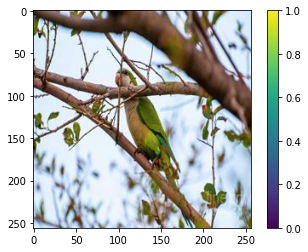

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


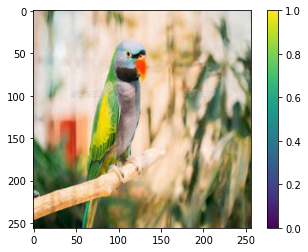

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


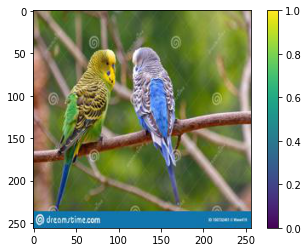

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


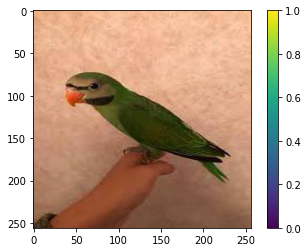

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


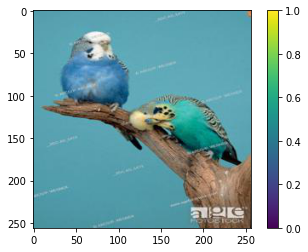

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


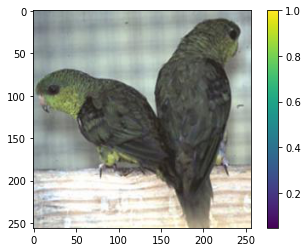

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


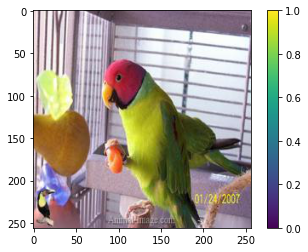

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


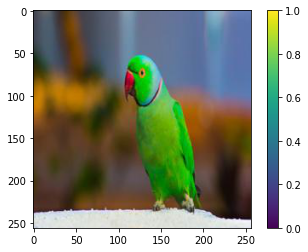

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


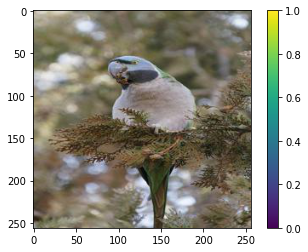

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


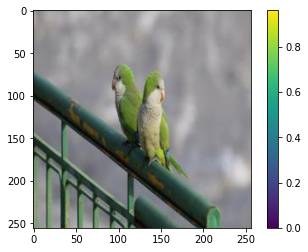

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


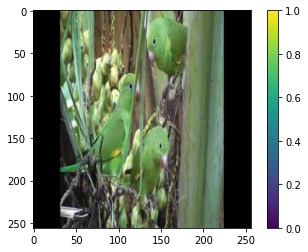

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [21]:
## Give one image of each type and label
legend = (sorted(os.listdir('parakeets')))
print("This is label key:")
print(legend)

for my_batch in image_generator:
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(labels[i])
    break   

Augmented data creation

Found 2267 images belonging to 11 classes.


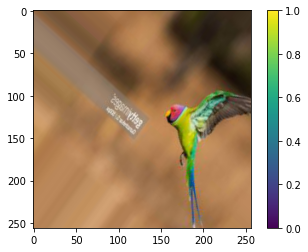

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


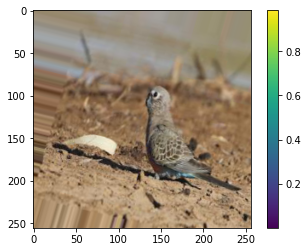

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


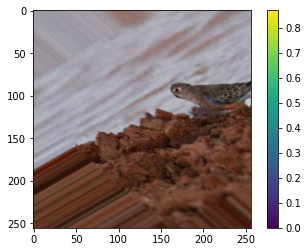

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


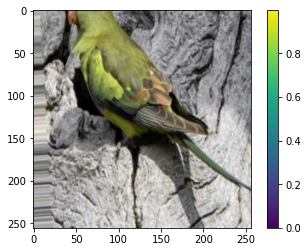

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


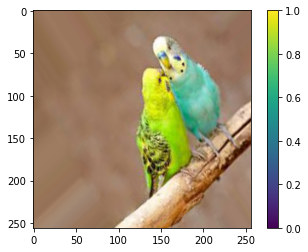

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


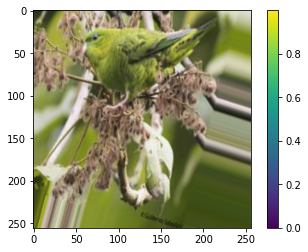

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


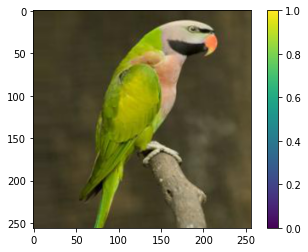

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


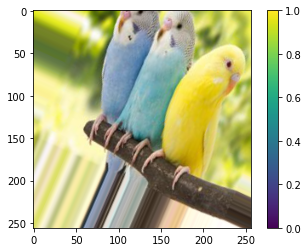

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


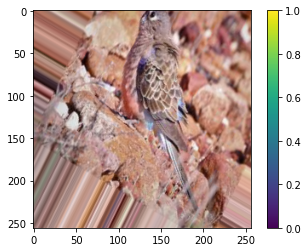

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


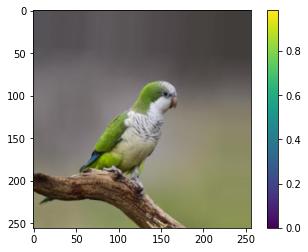

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


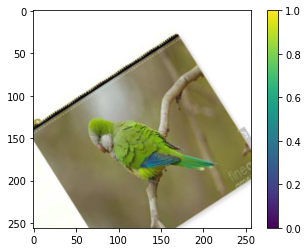

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [22]:
my_augmented_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest')

my_augmented_image_generator = my_augmented_generator.flow_from_directory( './parakeets', target_size=(256, 256), batch_size=11, class_mode='categorical')

for my_batch in my_augmented_image_generator:
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(labels[i])
    break



Overfitting models

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( MaxPool2D())
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 123, 123, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
flatten (Flatten)            (None, 468512)            0         
_________________________________________________________________
dense (Dense)                (None, 11)                5

In [24]:
# Compile
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 205, epochs = 12)

Epoch 1/12
205/205 [==============================] - 279s 1s/step - loss: 3.3017 - accuracy: 0.0933
Epoch 2/12
205/205 [==============================] - 277s 1s/step - loss: 2.3754 - accuracy: 0.1388
Epoch 3/12
205/205 [==============================] - 277s 1s/step - loss: 1.7630 - accuracy: 0.4994
Epoch 4/12
205/205 [==============================] - 277s 1s/step - loss: 0.6322 - accuracy: 0.8328
Epoch 5/12
205/205 [==============================] - 276s 1s/step - loss: 0.1761 - accuracy: 0.9692
Epoch 6/12
205/205 [==============================] - 276s 1s/step - loss: 0.0779 - accuracy: 0.9935
Epoch 7/12
205/205 [==============================] - 276s 1s/step - loss: 0.0886 - accuracy: 0.9935
Epoch 8/12
205/205 [==============================] - 276s 1s/step - loss: 0.0432 - accuracy: 0.9958
Epoch 9/12
205/205 [==============================] - 276s 1s/step - loss: 0.0633 - accuracy: 0.9954
Epoch 10/12
205/205 [==============================] - 276s 1s/step - loss: 0.0521 - accura

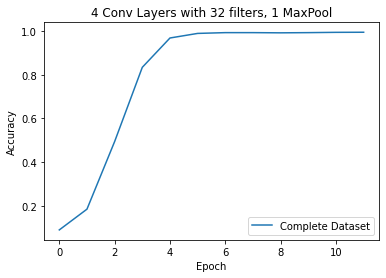

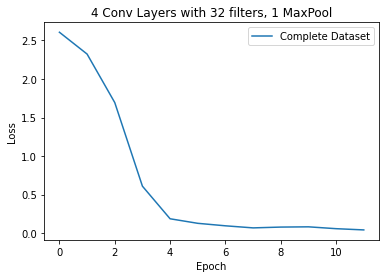

In [28]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '4 Conv Layers with 32 filters, 1 MaxPool'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [26]:
import matplotlib.pyplot as plt

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2032128)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                22353419  
Total params: 22,363,563
Trainable params: 22,363,563
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 205, epochs = 14)

Epoch 1/14
205/205 [==============================] - 377s 2s/step - loss: 16.1622 - accuracy: 0.0934
Epoch 2/14
205/205 [==============================] - 376s 2s/step - loss: 2.4010 - accuracy: 0.1623
Epoch 3/14
205/205 [==============================] - 376s 2s/step - loss: 2.1919 - accuracy: 0.3649
Epoch 4/14
205/205 [==============================] - 377s 2s/step - loss: 0.8347 - accuracy: 0.8229
Epoch 5/14
205/205 [==============================] - 377s 2s/step - loss: 0.1569 - accuracy: 0.9779
Epoch 6/14
205/205 [==============================] - 375s 2s/step - loss: 0.1563 - accuracy: 0.9925
Epoch 7/14
205/205 [==============================] - 375s 2s/step - loss: 0.0945 - accuracy: 0.9903
Epoch 8/14
205/205 [==============================] - 375s 2s/step - loss: 0.0447 - accuracy: 0.9956
Epoch 9/14
205/205 [==============================] - 375s 2s/step - loss: 0.1797 - accuracy: 0.9939
Epoch 10/14
205/205 [==============================] - 375s 2s/step - loss: 0.0651 - accur

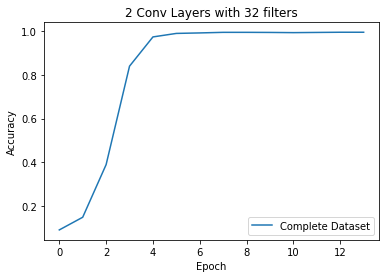

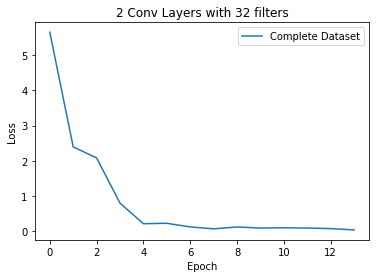

In [31]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '2 Conv Layers with 32 filters'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [32]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt

In [33]:
model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3) ) )
model.add( Flatten() )
model.add( Dense( 11, activation = 'softmax' ) )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2064512)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                22709643  
Total params: 22,710,539
Trainable params: 22,710,539
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 50, epochs = 20)

Epoch 1/20
50/50 [==============================] - 24s 479ms/step - loss: 175.2029 - accuracy: 0.1254
Epoch 2/20
50/50 [==============================] - 25s 492ms/step - loss: 2.4430 - accuracy: 0.2584
Epoch 3/20
50/50 [==============================] - 24s 486ms/step - loss: 2.0386 - accuracy: 0.3788
Epoch 4/20
50/50 [==============================] - 24s 480ms/step - loss: 1.5791 - accuracy: 0.5717
Epoch 5/20
50/50 [==============================] - 24s 487ms/step - loss: 1.3283 - accuracy: 0.6564
Epoch 6/20
50/50 [==============================] - 24s 486ms/step - loss: 1.2807 - accuracy: 0.7074
Epoch 7/20
50/50 [==============================] - 24s 482ms/step - loss: 0.9817 - accuracy: 0.7378
Epoch 8/20
50/50 [==============================] - 24s 488ms/step - loss: 0.6984 - accuracy: 0.8332
Epoch 9/20
50/50 [==============================] - 24s 477ms/step - loss: 0.6440 - accuracy: 0.8733
Epoch 10/20
50/50 [==============================] - 24s 484ms/step - loss: 0.5654 - accu

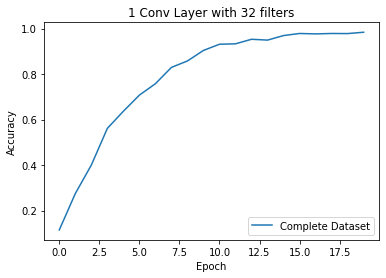

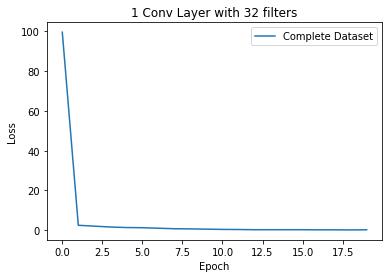

In [35]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '1 Conv Layer with 32 filters'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()

In [36]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(image_generator, steps_per_epoch = 205, epochs = 11)

Epoch 1/11
205/205 [==============================] - 100s 487ms/step - loss: 0.2022 - accuracy: 0.9781
Epoch 2/11
205/205 [==============================] - 100s 487ms/step - loss: 0.0820 - accuracy: 0.9924
Epoch 3/11
205/205 [==============================] - 100s 487ms/step - loss: 0.0982 - accuracy: 0.9915
Epoch 4/11
205/205 [==============================] - 100s 486ms/step - loss: 0.0510 - accuracy: 0.9950
Epoch 5/11
205/205 [==============================] - 100s 489ms/step - loss: 0.0224 - accuracy: 0.9951
Epoch 6/11
205/205 [==============================] - 100s 490ms/step - loss: 0.0477 - accuracy: 0.9929
Epoch 7/11
205/205 [==============================] - 100s 488ms/step - loss: 0.0612 - accuracy: 0.9932
Epoch 8/11
205/205 [==============================] - 100s 488ms/step - loss: 0.0563 - accuracy: 0.9960
Epoch 9/11
205/205 [==============================] - 100s 488ms/step - loss: 0.1922 - accuracy: 0.9815
Epoch 10/11
205/205 [==============================] - 100s 487m

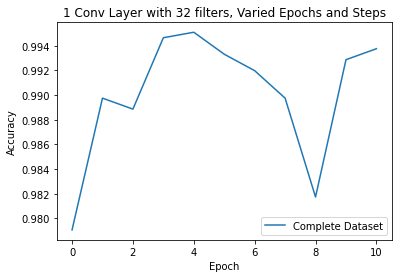

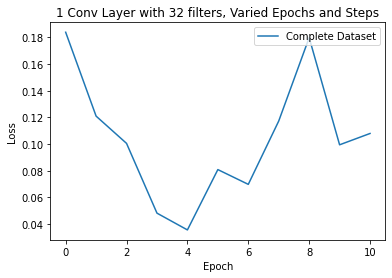

In [37]:
# Plot learning curve
import matplotlib.pyplot as plt

title = '1 Conv Layer with 32 filters, Varied Epochs and Steps'

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title(title)
plt.legend(['Complete Dataset'], loc='upper right')
plt.show()